Chapter 33  
# Clustering Members of the Karate Club
*Machine Learning Made Easy and Visual with Python*

## Initialization

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

## Load Data

In [5]:
G = nx.karate_club_graph()  
# Load the classic Zachary’s Karate Club social network graph

## Visualization

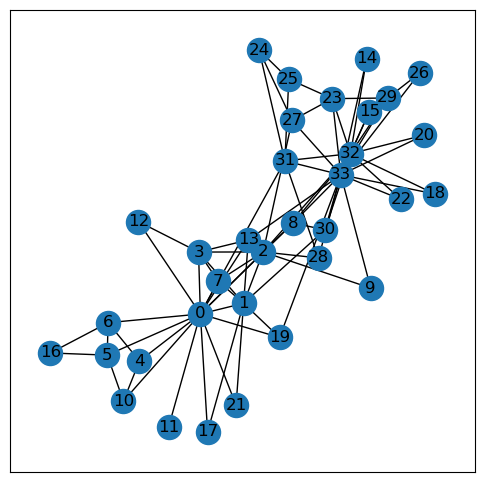

In [7]:
pos = nx.spring_layout(G, seed=2)  
# Generate node positions using a force-directed (spring) layout

plt.figure(figsize=(6, 6))
nx.draw_networkx(G, pos=pos)  
# Visualize the graph

## Adjacency Matrix

In [9]:
A = nx.adjacency_matrix(G).toarray()  
# Convert the graph into its adjacency matrix representation

In [10]:
A

array([[0, 4, 5, ..., 2, 0, 0],
       [4, 0, 6, ..., 0, 0, 0],
       [5, 6, 0, ..., 0, 2, 0],
       ...,
       [2, 0, 0, ..., 0, 4, 4],
       [0, 0, 2, ..., 4, 0, 5],
       [0, 0, 0, ..., 4, 5, 0]])

In [62]:
A.max()

7

In [64]:
A.min()

0

<Axes: >

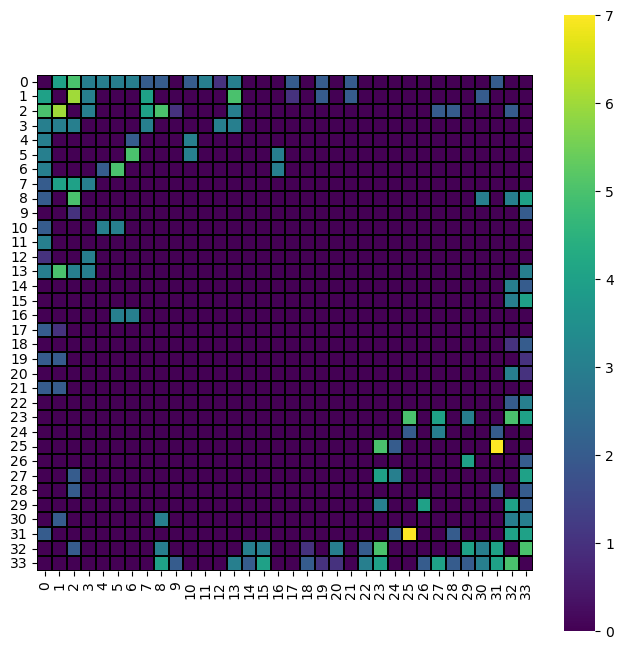

In [11]:
plt.figure(figsize=(8, 8))
sns.heatmap(A, cmap="viridis", square=True, 
            cbar=True, linecolor='k', 
            linewidths=0.1)
# Visualize adjacency matrix — edges correspond to 1s, non-edges to 0s

## Degree Matrix

In [13]:
degrees = np.sum(A, axis=1)  
# Compute the degree (number of connections) for each node

In [14]:
D = np.diag(degrees)  
# Construct the diagonal degree matrix

<Axes: >

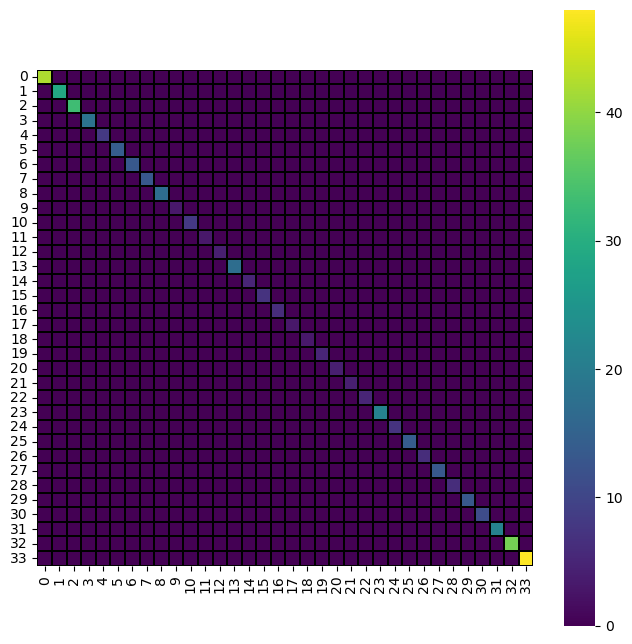

In [15]:
plt.figure(figsize=(8, 8))
sns.heatmap(D, cmap="viridis", 
            square=True, cbar=True, 
            linecolor='k', linewidths=0.1)
# Visualize the degree matrix — only diagonal entries are nonzero

## Degree Analysis

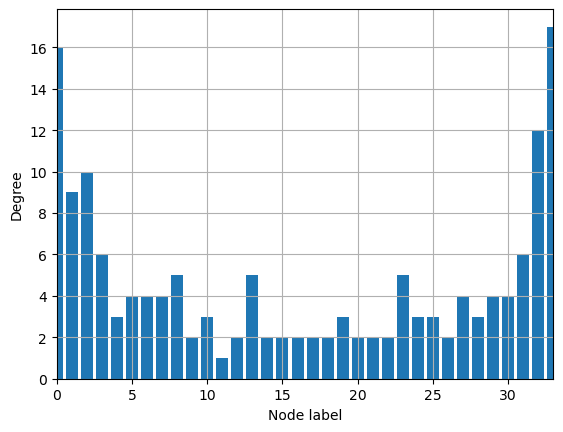

In [17]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
# Sort node degrees in descending order

dmax = max(degree_sequence)
dict_degree = dict(G.degree())
# Dictionary mapping node index to its degree

# Plot degree distribution
plt.bar(dict_degree.keys(), dict_degree.values())
plt.xlabel('Node label')
plt.ylabel('Degree')
plt.xlim(0, 33)
plt.grid(True)

In [18]:
# Define a helper function to filter nodes by specific degree value
def filter_value(dict_, unique):
    newDict = {}
    for (key, value) in dict_.items():
        if value == unique:
            newDict[key] = value
    return newDict

In [19]:
# Highlight nodes based on unique degree values
unique_deg = set(degree_sequence)
# Get unique degree values

In [20]:
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_deg)))
# Assign colors for each unique degree

C:\Users\james\anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


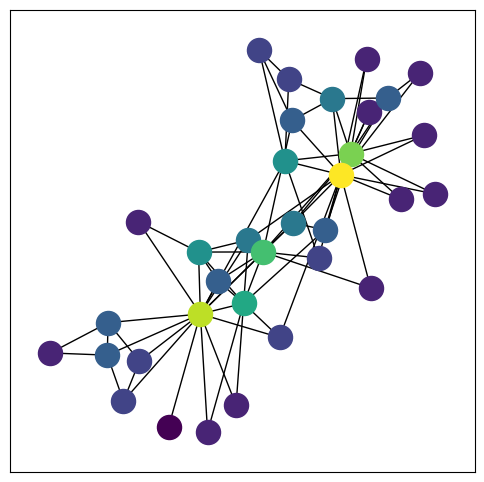

In [21]:
plt.figure(figsize=(6, 6))
nx.draw_networkx_edges(G, pos)
# Draw edges of the graph

# Draw nodes grouped by degree
for deg_i, color_i in zip(unique_deg, colors):
    dict_i = filter_value(dict_degree, deg_i)
    nx.draw_networkx_nodes(G, pos, 
                           nodelist=list(dict_i.keys()), 
                           node_color=color_i)

## Compute Laplacian Matrix

<Axes: >

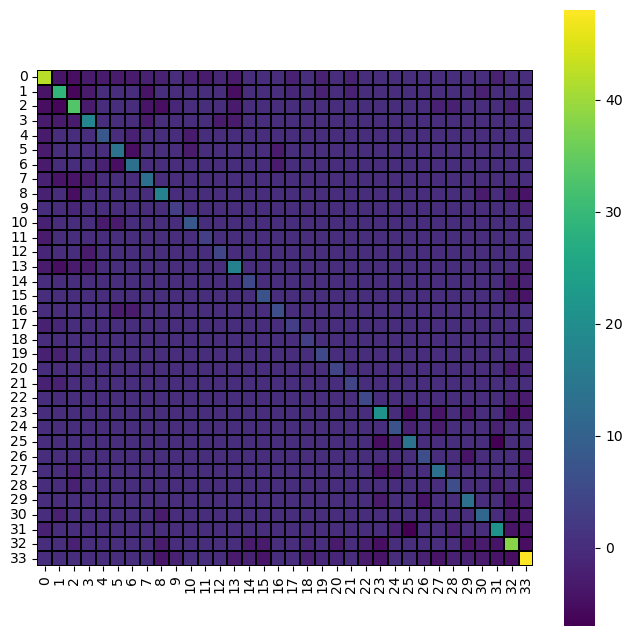

In [23]:
L = D - A  
# Unnormalized graph Laplacian: L = D - A

plt.figure(figsize=(8, 8))
sns.heatmap(L, cmap="viridis", 
            square=True, cbar=True, 
            linecolor='k', linewidths=0.1)
# Visualize the Laplacian matrix

## Compute Normalized Laplacian

In [25]:
D_inv_sqrt = np.diag(1.0 / np.sqrt(degrees))  
# Compute D^{-1/2} for normalization

In [26]:
L_norm = D_inv_sqrt @ L @ D_inv_sqrt  
# Normalized Laplacian: L_norm = D^{-1/2} * L * D^{-1/2}

<Axes: >

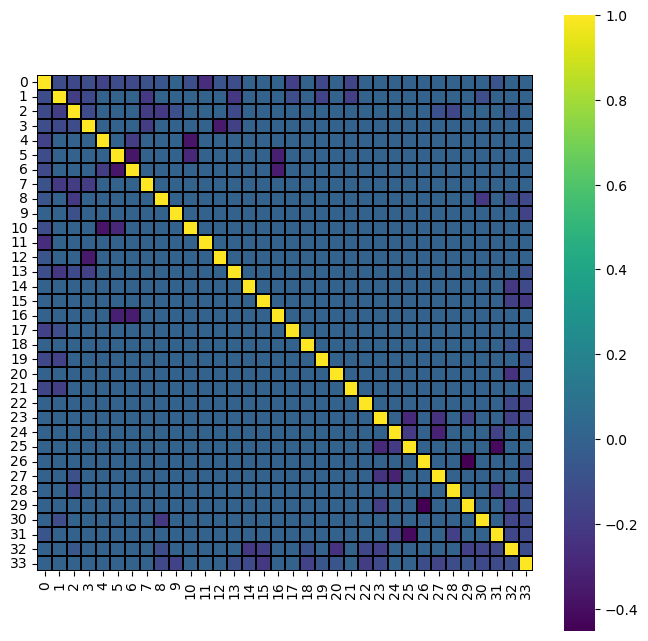

In [27]:
plt.figure(figsize=(8, 8))
sns.heatmap(L_norm, cmap="viridis", 
            square=True, cbar=True, 
            linecolor='k', linewidths=0.1)
# Visualize the normalized Laplacian matrix

## Eigen Decomposition

<Axes: >

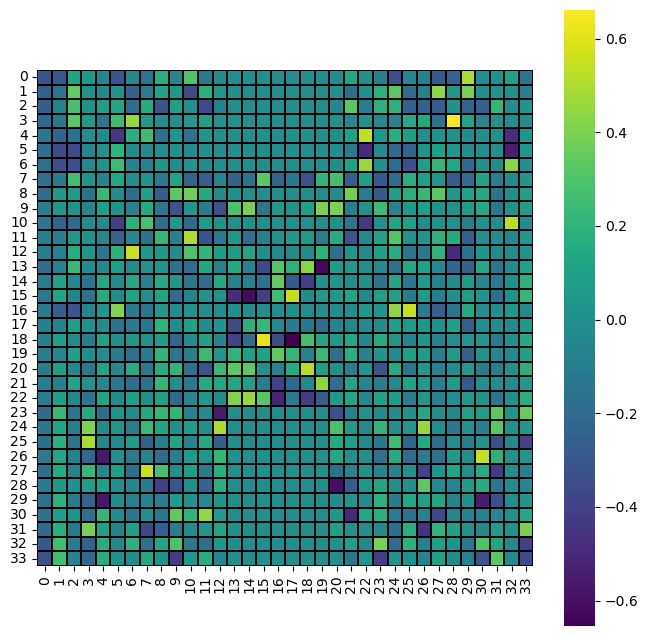

In [29]:
lambdas, V = np.linalg.eig(L_norm)
# Eigen decomposition of normalized Laplacian: L_norm * v = λ * v

# Sort eigenvalues and eigenvectors in ascending order
lambdas_sorted = np.sort(lambdas)
V_sorted = V[:, lambdas.argsort()]

## Eigenvectors Visualization

plt.figure(figsize=(8, 8))
sns.heatmap(V_sorted, cmap='viridis',
            square=True,
            linecolor='k', linewidths=0.1)
# Each column corresponds to one eigenvector

## Eigenvalues Visualization

<Axes: >

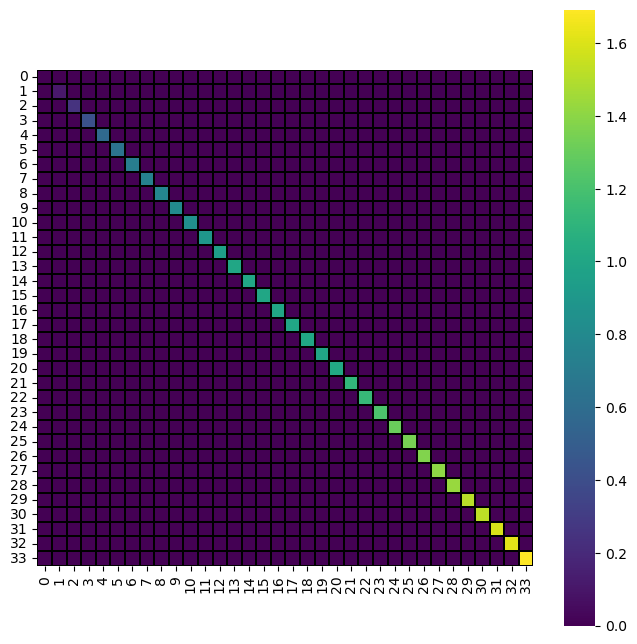

In [60]:
plt.figure(figsize=(8, 8))
sns.heatmap(np.diag(lambdas_sorted),
            cmap='viridis', square=True,
            linecolor='k', linewidths=0.1)
# Diagonal heatmap of sorted eigenvalues

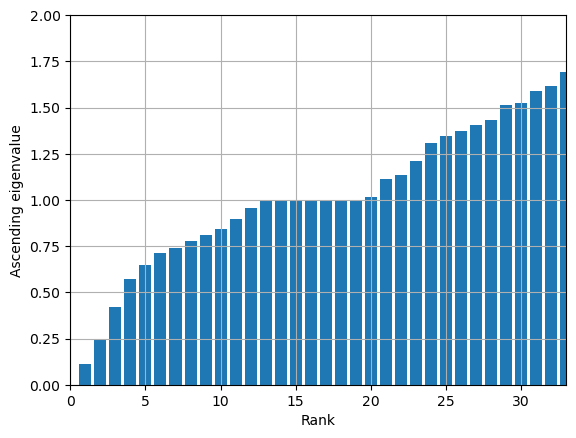

In [58]:
plt.bar(dict_degree.keys(), lambdas_sorted)
plt.ylabel('Ascending eigenvalue')
plt.xlabel('Rank')
plt.xlim(0, 33)
plt.ylim(0, 2)
plt.grid(True)
# Plot sorted eigenvalues — small eigenvalues capture cluster structure

## Projection to Low-Dimensional Space

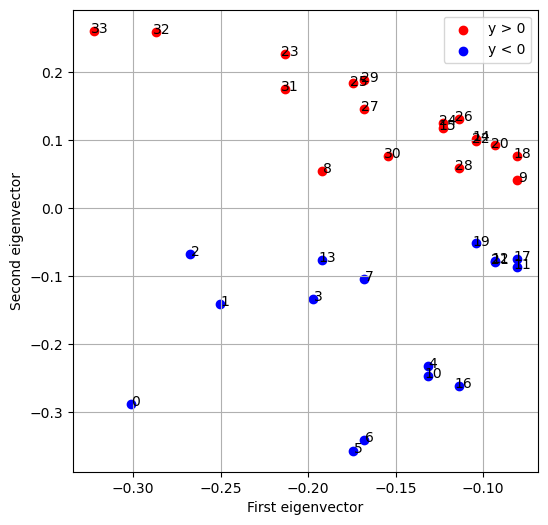

In [33]:
plt.figure(figsize=(6, 6))

# Use the second smallest eigenvector (Fiedler vector) to split the graph
positive_idx = V_sorted[:, 1] > 0  
negative_idx = V_sorted[:, 1] < 0  

# Plot nodes with positive Fiedler vector component (in red)
plt.scatter(V_sorted[positive_idx, 0], V_sorted[positive_idx, 1], 
            color='red', label='y > 0')

# Plot nodes with negative Fiedler vector component (in blue)
plt.scatter(V_sorted[negative_idx, 0], V_sorted[negative_idx, 1], 
            color='blue', label='y < 0')

# Annotate each node with its label
for i in range(V_sorted.shape[0]):
    plt.text(V_sorted[i, 0] + 0.003, V_sorted[i, 1] + 0.003,  
             str(i),  
             fontsize=10, 
             ha='center', va='center')

plt.grid(True)
plt.xlabel('First eigenvector')
plt.ylabel('Second eigenvector')
plt.legend()  
# Save eigenvector scatter plot — visualizing spectral clustering result

## Clustering Based on Fiedler Vector Sign

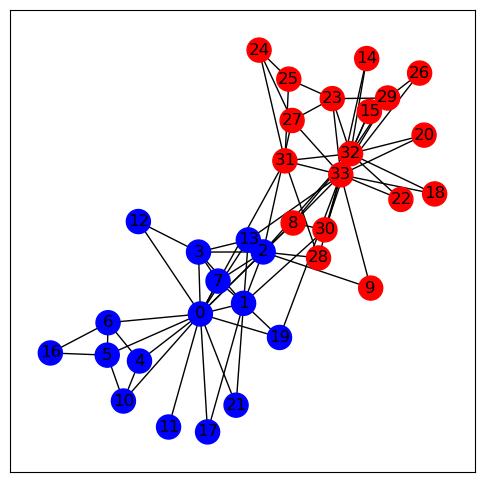

In [35]:
colors = ["r" for i in range(0, 34)]  
# Initialize all nodes as red
for i in range(0, 34):
    if (V_sorted[i, 1] < 0):
        colors[i] = "b"
# Assign blue to nodes with negative Fiedler vector component

plt.figure(figsize=(6, 6))
nx.draw_networkx(G, pos,
                 node_color=colors)
# Visualize clustering result on the graph — two groups separated by sign